In [1]:
import pandas as pd

In [68]:
df_1790to2001 = pd.read_csv('ICOADS_R3.0_Rqst493088_17900104-20010102.csv')
df_2001to2013 = pd.read_csv('ICOADS_R3.0_Rqst493088_20010103-20130407.csv')
df_2013tocurrent = pd.read_csv('ICOADS_R3.0_Rqst493088_20130408-20141231.csv')

In [69]:
df_2013tocurrent.sample(5)

,YR,MO,DY,HR,LAT,LON,SLP,AT,SST,DCK,SID,PT,UID,RN1,RN2,RN3,RSA,IRF
142773,2014,3,15,14.00,-60.02,172.65,1018.0,NaN,4.1,714,63,7,K88M8L,3,1,0,2,1
110008,2014,2,6,6.00,-61.15,155.28,992.9,NaN,2.5,714,63,7,K7IWQ5,3,1,0,2,1
157323,2014,4,2,15.00,-60.94,111.60,NaN,NaN,1.2,714,63,7,K8LJVI,3,1,0,2,1
206459,2014,9,23,21.00,-61.93,185.25,959.7,NaN,NaN,714,63,7,KCGQB1,3,1,0,2,1
66400,2013,10,13,9.67,-63.81,201.53,995.6,NaN,NaN,714,63,7,K5B0ZF,3,1,0,2,1


In [70]:
df_2013tocurrent.groupby('DCK').count().YR.to_csv('ICOADS_R3.0_Rqst493088_20130408-20141231.DCK_Count.csv')

In [38]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [63]:
#define the basic map projection information and figure size

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(20.5, 5.25),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

#download land mask
# 50m is a good balance between dataset size and land feature resolution
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

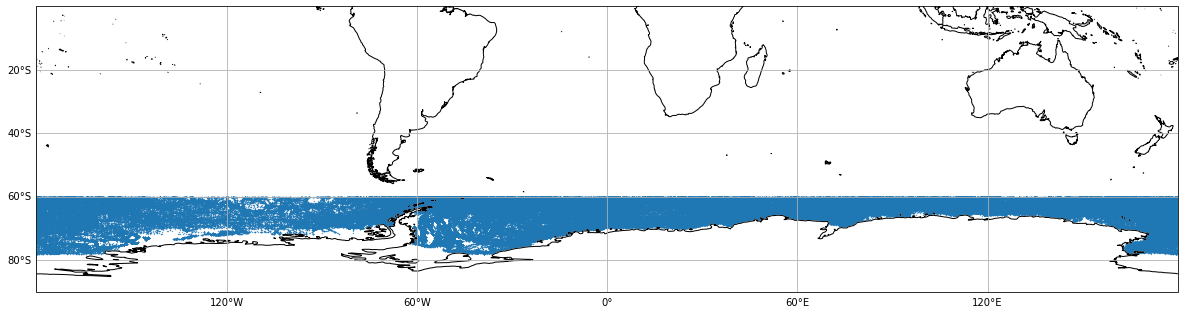

In [73]:
t= df_1790to2001

fig,ax = make_map()
ax.scatter(t.LON,t.LAT,.1)

ax.set_extent([-179,179,-0,-90])
ax.add_feature(land_50m)
ax.coastlines(resolution='50m')


In [90]:
df_subset = df_1790to2001.loc[(df_1790to2001.YR == 1945) | (df_1790to2001.YR == 1946) | 
                  (df_1790to2001.YR == 1947) | (df_1790to2001.YR == 1948) | 
                  (df_1790to2001.YR == 1949) | (df_1790to2001.YR == 1950) | 
                  (df_1790to2001.YR == 1951)]
df_subset.to_csv('1945-1951_Antarctic.csv')

In [92]:
df_subset.groupby('DCK').count().YR.to_csv('1945-1951_Antarctic.DCK_Count.csv')

/Users/bell/miniconda3/envs/holoviz/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/bell/miniconda3/envs/holoviz/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


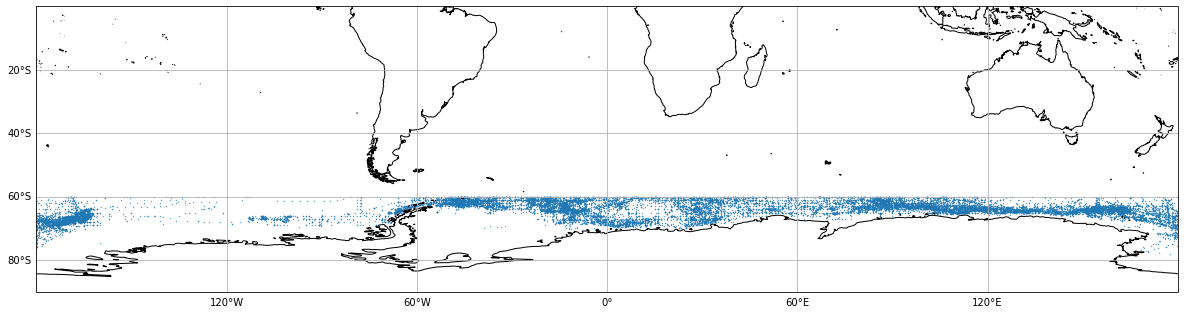

In [89]:
t= df_subset

fig,ax = make_map()
ax.scatter(t.LON,t.LAT,.1)

ax.set_extent([-179,179,-0,-90])
ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
